In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [99]:
studentVle = pd.read_csv('./anonymisedData/studentVle.csv')
studentInfo = pd.read_csv('./anonymisedData/studentInfo.csv')
studentRegistration = pd.read_csv('./anonymisedData/studentRegistration.csv')
studentAssessment = pd.read_csv('./anonymisedData/studentAssessment.csv')
vle = pd.read_csv('./anonymisedData/vle.csv')
assessments = pd.read_csv('./anonymisedData/assessments.csv')
courses = pd.read_csv('./anonymisedData/courses.csv')

studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


## EDA

### Student info

In [100]:
# cek nilai unik
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [101]:
# cek nilai null pada student info
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

hmm... terdapat 1111 data null di fitur imd band. selanjutnya lihat penyebaran data imd band

<AxesSubplot:>

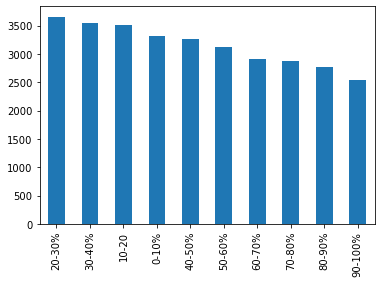

In [102]:
studentInfo.imd_band.value_counts().plot(kind='bar')

value "20-30%" menepati posisi terbanyak dibandingkan value lainnya. untuk itu missing value bisa digantikan dengan

In [103]:
# replace data null menjadi nilai nilai yang memiliki frekuensi terbanyak
studentInfo = studentInfo.fillna(studentInfo.mode().iloc[0])

# cek lagi untuk nilai nullnya
studentInfo.isna().sum() 

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

sudah teratasi

<AxesSubplot:xlabel='final_result', ylabel='count'>

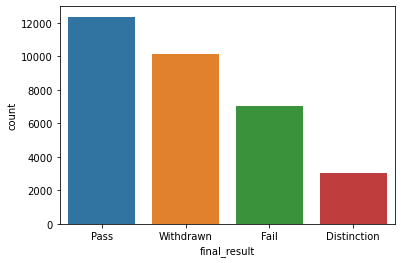

In [104]:
# cek jumlah final result siswa
sns.countplot(data=studentInfo, x='final_result')


<AxesSubplot:xlabel='gender', ylabel='count'>

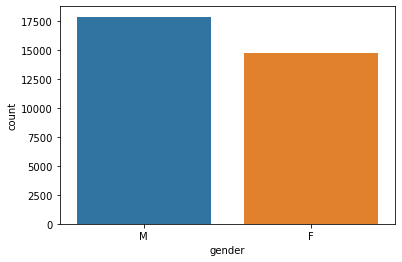

In [105]:
# cek jumlah gender (jenis kelamin) siswa
sns.countplot(data=studentInfo, x='gender')

terdapat lebih banyak siswa laki-laki dibandingkan perempuan

<AxesSubplot:xlabel='age_band', ylabel='count'>

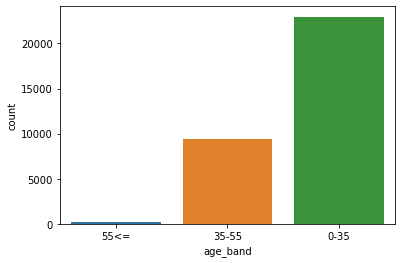

In [106]:
# cek jumlah kelompok umur
sns.countplot(data=studentInfo, x='age_band')

mayoritas siswa ada pada kelompok umur dari 0 sampai 35. Terdapat juga sebagian kecil orang yang umurnya diatas 55 tahun

<AxesSubplot:xlabel='num_of_prev_attempts', ylabel='count'>

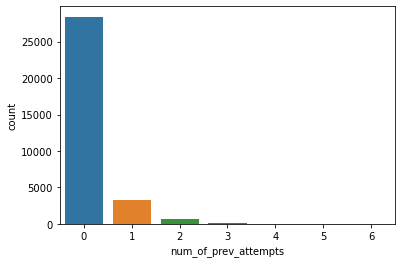

In [107]:
sns.countplot(data=studentInfo, x='num_of_prev_attempts')

mayoritas siswa dapat menyelesaikan modul dalam 1 kali percobaan (0 attempts)

<AxesSubplot:ylabel='code_module'>

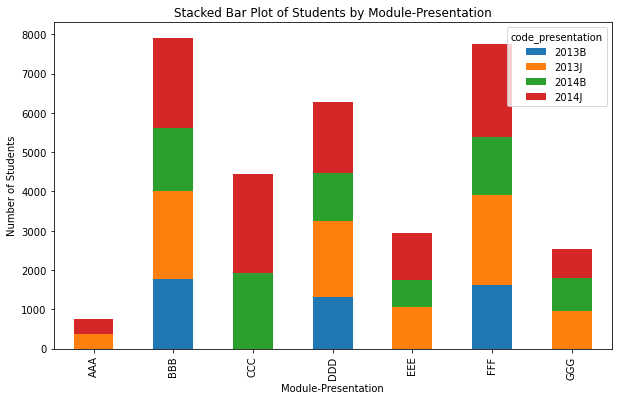

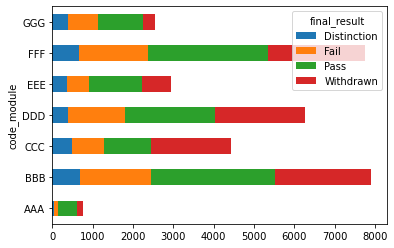

In [108]:
grouped_data = studentInfo.groupby(['code_module', 'code_presentation'])['id_student'].count()

stacked_data = grouped_data.unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Module-Presentation')
plt.ylabel('Number of Students')
plt.title('Stacked Bar Plot of Students by Module-Presentation')

pd.crosstab(studentInfo['code_module'], studentInfo['final_result']).plot.barh(stacked=True)

informasi yang bisa didapatkan dari 2 grafik diatas adalah sebagai berikut:
  - terlihat bahwa modul FFF dan BBB memiliki peminat terbanyak dibandingkan modul lainnya
  - modul AAA adalah modul yang paling sedikit peminatnya
  - modul AAA hanya dilaksanakan pada akhir tahun (oktober)
  - Modul CCC baru ada dan diakses pada tahun 2014
  - modul EEE dan GGG baru dibuat dan diakses pada akhir tahun 2013 (oktober)
  - walaupun kode modul FFF dan BBB memiliki peminat paling tinggi tetapi memiliki tingkat siswa yang DO/menyerah/mengundurkan diri terbanyak

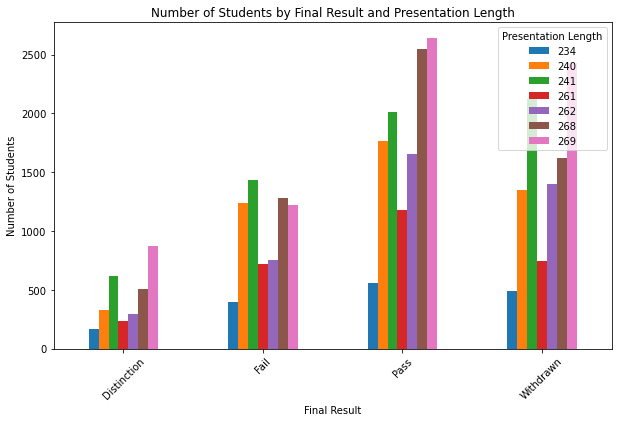

In [109]:
merge_info_course = pd.merge(studentInfo, courses, on=['code_module', 'code_presentation'])

# Perform the groupby operation and count, and sort the index in descending order
grouped_data = merge_info_course.groupby(['final_result', 'module_presentation_length'])['id_student'].count().sort_index(ascending=False)

# Create a bar plot
grouped_data.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.title('Number of Students by Final Result and Presentation Length')

# Show the plot
plt.legend(title='Presentation Length', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

dari grafik diatas bisa dilihat bahwa lamanya presentasi tidak begitu berpengaruh dengan final result siswa. tetapi panjang presentasi memiliki pengaruh pada siswa yang mengundurkan diri.

### student assessment

In [110]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [111]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [112]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


terdapat 173 value pada fitur score yang null. dan range data score adalah 0-100 maka untuk data kosong diisi dengan nilai rata-rata/mean

In [113]:
studentAssessment['score'] = studentAssessment['score'].fillna(studentAssessment['score'].mean)

In [114]:
studentAssessment.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

### Student Registration

In [115]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [116]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

terdapat banyak sekali nilai null pada date_unresgistration. nilai null ini berarti siswa tersebut telah menyelesaikan modulnya. mari kita lihat final result siswa yang menyelesaikan modulnya

<AxesSubplot:>

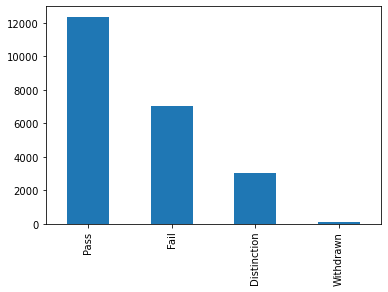

In [117]:
merge_info_reg = pd.merge(studentInfo, studentRegistration, on=['code_module', 'code_presentation', 'id_student'])
merge_info_reg[merge_info_reg['date_unregistration'].isnull()]['final_result'].value_counts().plot(kind='bar')

dari penjelasan dataset dari website resmi. orang yang mengundurkan diri dari modul akan tercatat "witdrawn" pada final result. dan hanya sedikit siswa yang mengundurkan diri dari suatu modul.

selanjutnya adalah menganalisis ketertarikan siswa saat mengakses VLE/LMS

In [118]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [119]:
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

terlihat pada student vle tidak memiliki nilai null sama sekali. hal ini bisa jadi dikarenakan seluruh data yang ada diinput oleh sistem.

In [120]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

<AxesSubplot:>

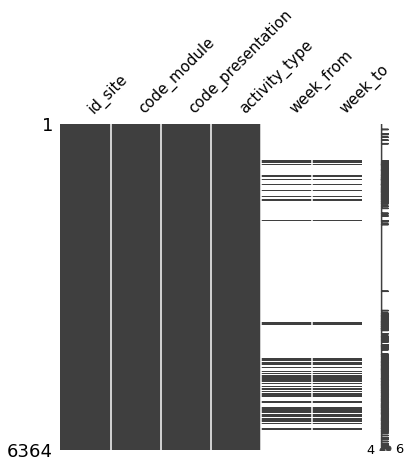

In [121]:
# Kita identifikasi missing value dari dataset LMS
msno.matrix(vle, figsize=(6,6), fontsize=15)

jumlah missing value pada week_from dan week_to sangat banyak. oleh karena itu, dihapus saja

In [123]:
vle.drop(columns=['week_from','week_to'],inplace=True)

In [124]:
# merge studentvle dengan vle
merge_studentVle_vle = pd.merge(studentVle, vle, on=['code_module', 'code_presentation', 'id_site'])
merge_studentVle_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng
...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent
10655276,GGG,2014J,499187,896969,228,8,oucontent
10655277,GGG,2014J,629258,896969,228,23,oucontent
10655278,GGG,2014J,534672,896969,228,1,oucontent


In [131]:
grouped_data = merge_studentVle_vle.groupby(['code_module', 'activity_type'])['sum_click'].mean().reset_index()
grouped_data.rename(columns={'sum_click': 'average_clicks'}, inplace=True)

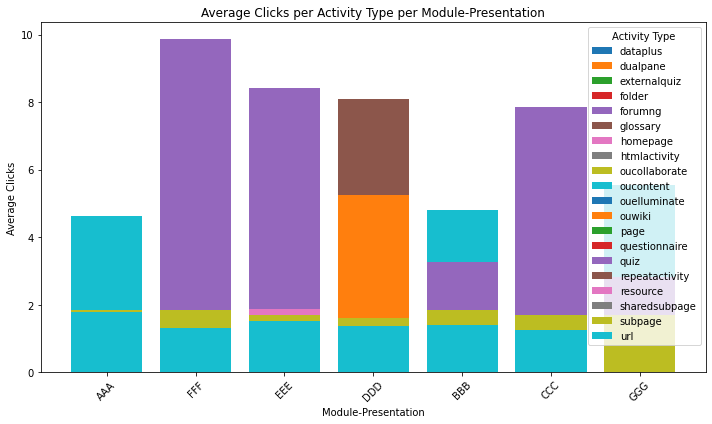

In [152]:
plt.figure(figsize=(10, 6))
for activity_type, group in grouped_data.groupby('activity_type'):
    plt.bar(group['code_module'], group['average_clicks'], label=activity_type)

plt.xlabel('Module-Presentation')
plt.ylabel('Average Clicks')
plt.title('Average Clicks per Activity Type per Module-Presentation')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Activity Type')

# Show the plot
plt.tight_layout()
plt.show()

dari grafik diatas terlihat bahwa aktivitas kuis memiliki peminat paling banyak pada modul FFF EEE dan CCC. sedangkan Glosarium memiliki peminat paling banyak pada modul DDD